## Introduction

In this notebook you will learn the machinery to solve differential equations who do not have an analytical solution. Often times the differential equations governing systems in the real world are either too difficult to solve by hand or simply do not have a solution. Often times the most logical solution to these types of problems is whats called the Euler Method of Numerical Integration. This method is the simpliest and most logical but often times not wholey accurate. For more information here is a great video: https://www.youtube.com/watch?v=WMQ2Cac4sqw

The best alternative to the Euler Method is the Runge-Kutta Method. This involves multiple tangent lines based off of one another to better approximate the next step along the curve. These Runge-Kuttas (shorthanded to RK) come in different lengths depending on the granularity needed. The most often used is the RK4, a RK involving four different tangent lines. The RK method provides a much clearer description of the behavior of a graph than the Euler Method for very little extra work. Please watch this video before continuing the assignment; it has amazing diagrams and explains the method in great detail: https://www.youtube.com/watch?v=HOWJp8NV5xU

## Example

Before coding your first RK please watch the video provided. In the following cell an example of a Runge-Kutta fit will be shown on a parabola. I will then ask you to use the Runge-Kutta method to perform a fit of a cubic function. There are SciPy functions that will perform the approximation but you are expected to write the code for the RK yourself as it is rather short and will improve your understanding of what the method does.

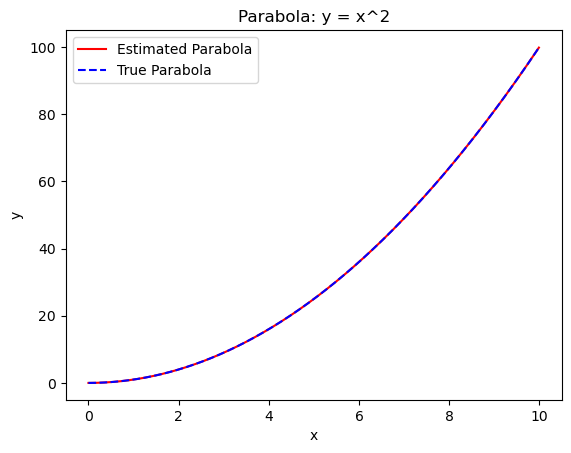

In [2]:
import numpy as np
import matplotlib.pyplot as plt


'''
Before anything can be approximatted the Runge-Kutta method needs to be written in code. I have made this into a definition to allow 
easy use in the future. This is a definition named 'rk4' that has multiple inputs, lets break them down.

The first input 'func' is the function you will be approximating. these functions will be definitions themselves which is why 
there are parenthases following the 'func' in the definition.

The second input 'dt' represents the small time interval you will be stepping along during the approximation. If this number is too large
the approximation will become inaccurate as it will be in very low definition. If this number is too small the program will take an
incredible amount of time to run and could potentially become inaccurate due to computer round off errors.

The third input 't0' will be representative of where the function is at in time.

The final input 'y0' is the initial conditions of the system.
'''


def rk4(func, dt, t0, y0):
    f1 = func(t0, y0)  # Example of 'func' with the inputs 't0' and 'y0'
    f2 = func(t0 + dt / 2, y0 + (dt / 2) * f1) # Example of 'func' with the inputs 't0 + dt / 2' and 'y0 + (dt / 2) * f1'
    f3 = func(t0 + dt / 2, y0 + (dt / 2) * f2)
    f4 = func(t0 + dt, y0 +dt * f3)
    yout = y0 + (dt / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
    return yout # This output is the estimated next point on the graph.

'''
For this example we will be working with the parabola defined below. To use the RK estimation, the curve needs to be expressed as a
system of first order ODEs. For the parabola this is simple but we will see its not as straight forward for the pendulum.
'''

def parabola_system(t, f,): # This is a definition defining a parabola with the inputs of time and f which stores the x and y info
    dfdt = np.zeros_like(f)       # This creates the x and y info in the f array as being all zeros and stores it as dfdt.
    dfdt[0] = 1          # dx/dt = 1
    dfdt[1] = 2*f[0]   # dy/dt = 2x
    return dfdt

y0 = [0,0]   # Setting the initial conditions of the parabola. This makes it start at the origin.


dt = 0.01   # This is the incrament of time.
T = 10      # Amount of time integrating over.
num_time_pts = int(T / dt)    
t = np.linspace(0, T, num_time_pts)   # Makes a list of all the times to be tested.



F = np.zeros((2, num_time_pts))   # This makes an array with two columns as long as the list of times all filled with zeros.
F[:, 0] = y0     # This means all rows, the ':', in the first column, the '0', are set to the initial conditions.
yin = y0          # This stores the first state so it can be put into the RK integrator
for i in range(num_time_pts - 1):       # This loops over all of the time intervals that were made except the last one.
    yout = rk4(parabola_system, dt, t[i], yin)        # This calculates the where the next point on the curve should be.
    F[:, i + 1] = yout     # This next point is then stored in the next column of the position table. 
    yin = yout       # This calculated value is then stored to be plugged in as the next step in the integrator.


plt.plot(F[0, :], F[1, :], 'r', label='Estimated Parabola')   # This plots the x and y coordinates stored in the table.



'''
The rest of this is a basic plot of a parabola using the known formula. As you can see the approximation fits the actual graph
nearly perfectly
'''
x_min, x_max = 0, 10
num_points = 500

x = np.linspace(x_min, x_max, num_points)

y = x**2

plt.plot(x, y, 'b', linestyle='--', label="True Parabola")  # the "label='string'" argumnet is how to label a line using matplotlib.
plt.xlabel("x")
plt.ylabel("y")
plt.legend()        # On top of adding the label argument to the plot functions this is needed to make a legend appear with the relevent info.
plt.title("Parabola: y = x^2")
plt.show()


## Practice

Now that an RK4 fit has been shown for a parabola, do the same process to find a fit for a cubic function from x=-10 to x=10.

In [1]:
'''
Type your code for the cubic function here.
'''


'\nType your code for the cubic function here.\n'

## Important Information

Now that we have seen the power of an RK estimation it is time to apply it to a real world example. In class you learned that a pendulum behaves similarly to a mass on spring periodic system. In reality it only appears to follow this pattern. We use the small angle approximation, $sin(\theta) = \theta$, to find this periodic solution. Even this small angle approximation only works for small angles for a few seconds afterwhich the true motion of the parabola and the small angle solution diverge. For the next part you will be required to use the RK4 fit show how the small angle approximation differs from the RK4 which represents the true solution. 

It is important to remember the RK4 only takes first order differential equations and the differential equation for the motion of the pendulum, $\ddot\theta = \frac{g}{l}sin(\theta)$ is a second order equation. To fix this you will have to split it into to first order equations by defining it as the system, $\omega = \dot\theta$ and $\dot\omega = -\frac{g}{l}sin(\theta)$. When making a definition for the pendulum to be put into the RK4 system make sure to include both equations and store them similarly to the x and y variables before.

For full credit please make two sets of plots, one at a small angle, $\frac{\pi}{36}$ a.k.a. 5 degrees, and a second at a large angle, $\frac{\pi}{2}$ a.k.a. 90 degrees. The set of plots required are plot with both the small angle approximation and RK4 approximation on top of each other with the x axis being time and the y axis being amplitude in radians and the second is a graph of how differnt these two approximations are from eachother over time. Please label and differentiate the lines as was done in the example. 

Below is an example of what my small angle graphs looked like. Note your graphs may appear different if you choose a different pendulum length than I did.

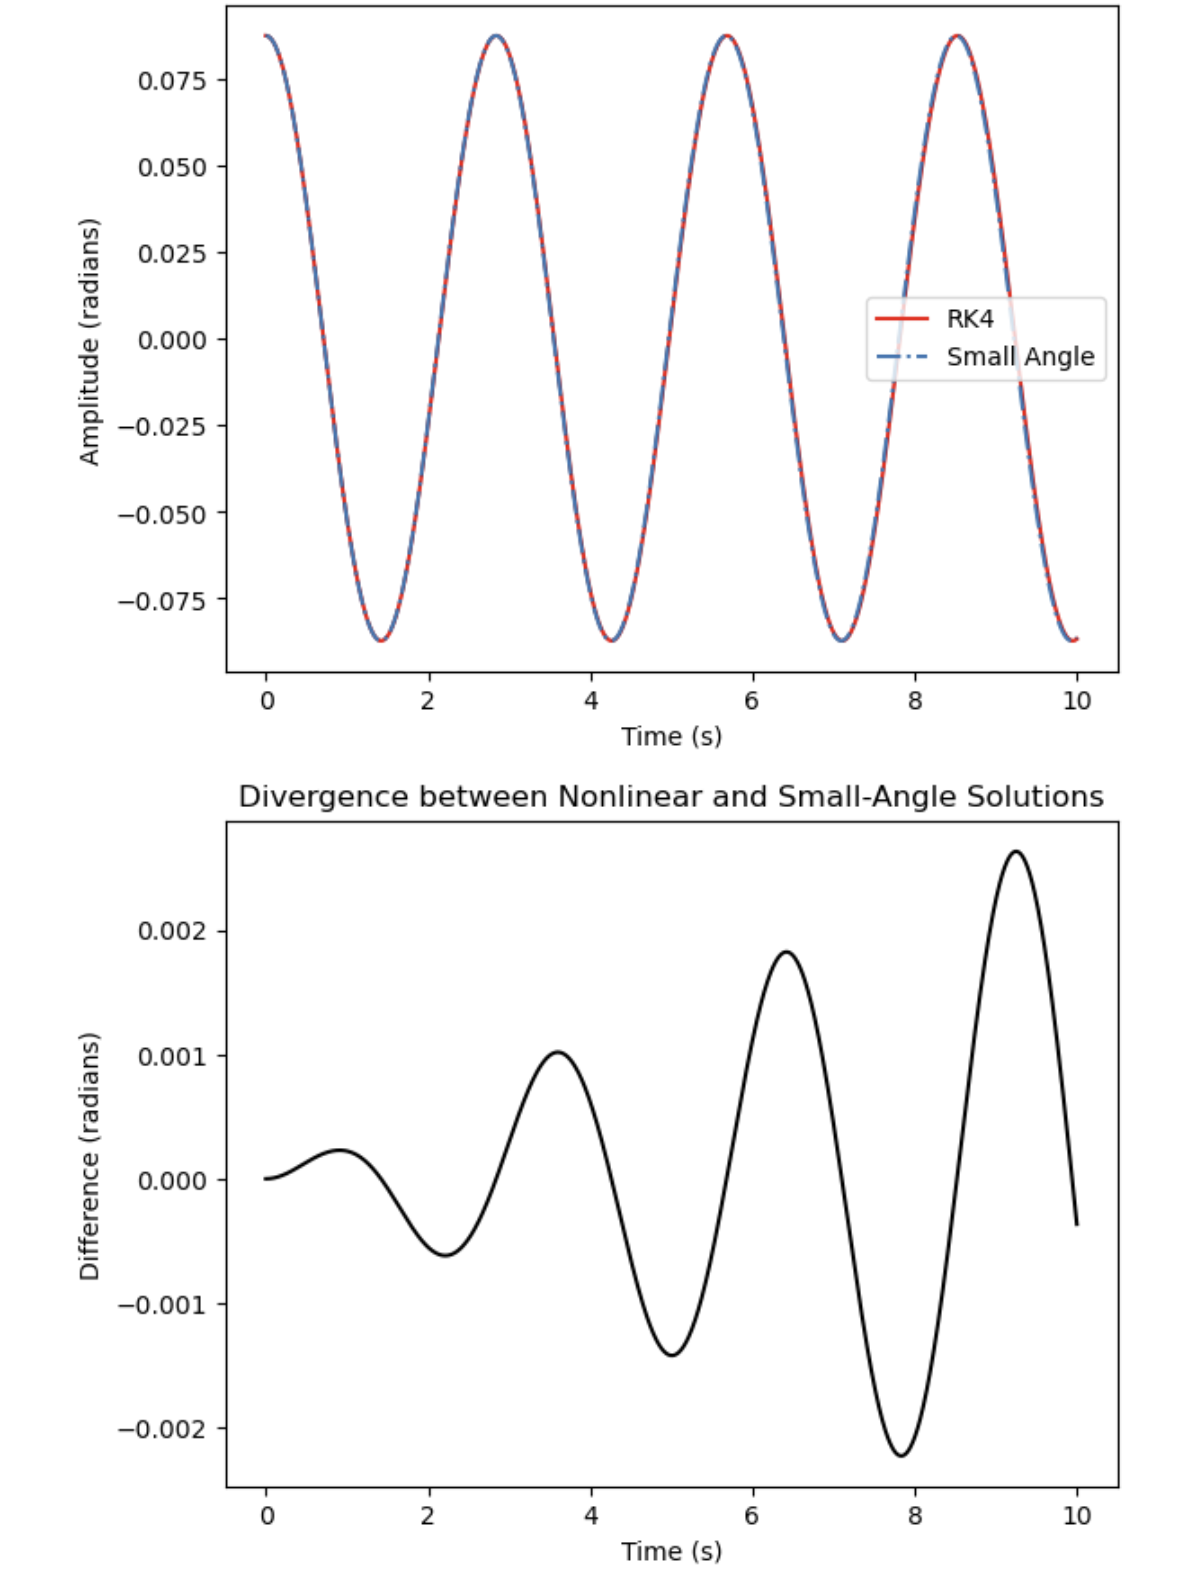

In [ ]:
'''
Code for the small angle here.
'''

In [ ]:
'''
Code for the large angle here.
'''

## Conclusion

Write a brief statement on the results of both the small and large angle graph sets. Why does the small angle approximation breakdown at large angle and what trend is seen as time progresses for the difference. Please type this out in a markdown box below this one.